# Computational physics P452 endsem

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
import math
import matplotlib.pyplot as plt
from Chandan_Library_Endsem import *
import warnings
warnings.filterwarnings("ignore")


# Question 1


Lifetime: 473.56675752523284 ± 55.28239131380527
Chi square: 17.500389771867532
The fit is not acceptable at 95% level of significance.


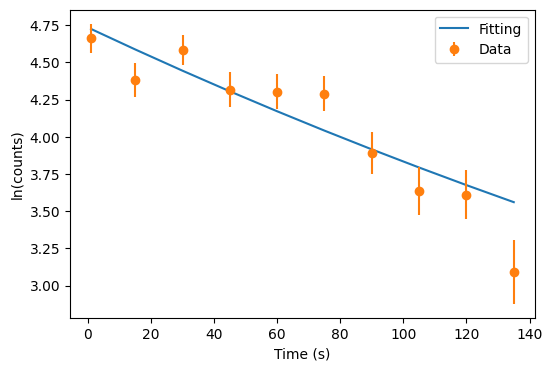

In [2]:
time, counts, uncertainties = np.genfromtxt('endsemfit.txt', unpack=True)

# Define the exponential decay function
def func(t, a, b):
	return a * np.exp(-b * t)

# Convert counts to natural logarithm and calculate its uncertainty
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

# Use curve_fit to fit the exponential decay function to the data
popt, pcov = curve_fit(func, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)
intercept, slope = popt
covariant_matrix = pcov

# Calculate the lifetime and its error
lifetime = 1 / slope
error_lifetime = np.sqrt(np.diag(covariant_matrix))[1] / slope**2
df = len(time) - 1

# Calculate the chi-square statistic and the reduced chi-square statistic
chi_square = np.sum(((ln_counts - func(time, *popt)) / sigma_ln_counts) ** 2)

critical_chi_squared = 16.919

print('Lifetime:', lifetime, '±', error_lifetime)
print('Chi square:', chi_square)

# Determine if fit is acceptable at 95% level of significance
if chi_square < critical_chi_squared:
    print("The fit is acceptable at 95% level of significance.")
else:
    print("The fit is not acceptable at 95% level of significance.")

# Plot the data and the fit
plt.figure(figsize=(6, 4))
fit = func(time, *popt)
fit = np.array(fit)
plt.plot(time, fit, label='Fitting')
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('ln(counts)')
plt.legend()
plt.show()


# Question 2


In [3]:
# Define the function g(x), this has to be input by the user
def g1(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return R*T/(p+(a/(V**2))) + b

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g1, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")

# Define the function g(x), this has to be input by the user
def g2(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return math.sqrt(a/(R*T/(V-b) - p))

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g2, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")


Root of the given equation: 3.92995
Number of iterations performed: 10
Root of the given equation: 0.18566
Number of iterations performed: 36


# Question 3
Done in answer sheet


# Question 4
Done in answer sheet

# Question 5



In [4]:
matrix = np.loadtxt('endsemmat.txt')

print("Matrix:")
print(matrix)
print()

# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
matrix_n = matrix
for _ in range(2):
    eigenvalue, eigenvector = power_method_AR(matrix_n, 1000)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    # Deflate the matrix
    matrix_n = matrix_n - eigenvalue * np.outer(eigenvector, eigenvector)

# Print the eigenvalues and eigenvectors
print("Calculated Eigenvalues and Eigenvectors:\n")
for i in range(2):
    print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    print(f"Eigenvector {i+1}: {eigenvectors[i]}")
    print()

# Constants
a = c = -1
b = 2
n = 5

# Calculate expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

# Normalizing 
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

print('Expected eigenvalue', i+1, expected_eigenvalues[0])
print('Expected eigenvalue', i+1, expected_eigenvalues[1])


Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Calculated Eigenvalues and Eigenvectors:

Eigenvalue 1: 3.7320508075688776
Eigenvector 1: [-0.28867513  0.5        -0.57735027  0.5        -0.28867513]

Eigenvalue 2: 3.0000000000000004
Eigenvector 2: [ 5.00000000e-01 -5.00000000e-01 -2.59052039e-16  5.00000000e-01
 -5.00000000e-01]

Expected eigenvalue 2 3.7320508075688776
Expected eigenvalue 2 3.0


# Question 6

Probability of getting success: 0.4830171181266664


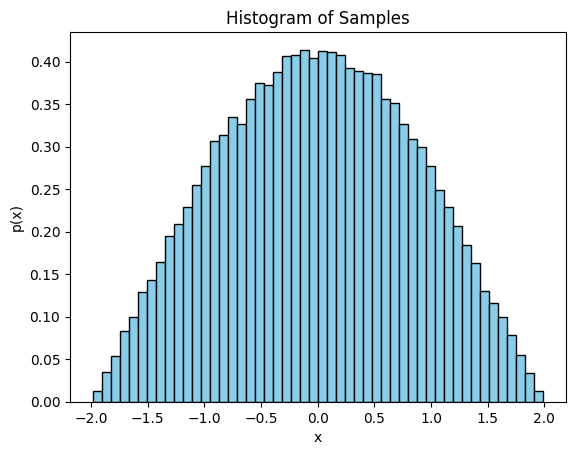

In [5]:
a = 2
N = 100000

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0

# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	# sample from Gaussian distribution
	x = np.random.normal(0, a)  
	# uniform random number
	u = np.random.uniform(0, 0.5 * a**2)
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1

# Print success probability
print(f"Probability of getting success: {N / (N + num_rejected)}")

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, color='skyblue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of Samples')
plt.show()


# Question 7


Expectation value of Hamiltonian: 

a = 0.1: E = 2.4317374377664143
a = 0.2: E = 1.2995561266841438
a = 0.3: E = 0.8673480999973646
a = 0.4: E = 0.680947356596316
a = 0.5: E = 0.4750513176008083
a = 0.6: E = 0.4085641157456651
a = 0.7: E = 0.3536069469678415
a = 0.7999999999999999: E = 0.28670619443325346
a = 0.8999999999999999: E = 0.26437399807278
a = 0.9999999999999999: E = 0.28945543556306996
a = 1.0999999999999999: E = 0.21926202254713958
a = 1.2: E = 0.21520001637466443
a = 1.3: E = 0.18212462555271505
a = 1.4: E = 0.17120804824985547
a = 1.5: E = 0.1502995307269304
a = 1.5999999999999999: E = 0.13352595826099053
a = 1.7: E = 0.17590637669557
a = 1.8: E = 0.15498834870194989
a = 1.9: E = 0.14126168353161309
a = 2.0: E = 0.07627421034444684


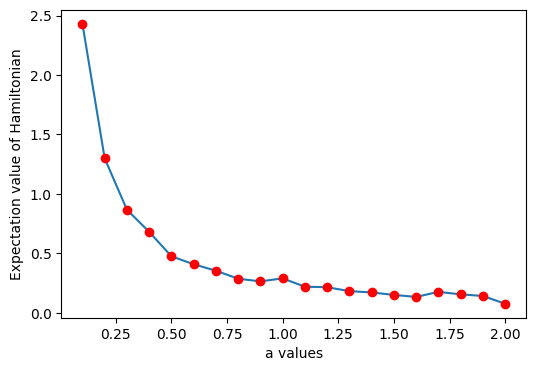

In [6]:
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi_trial(x, a):
    return np.exp(-a * x**2)

def psi_trial_prime(x, a):
    return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def Hamiltonian(x, a):
    kinetic_energy = -0.5 * psi_trial_prime(x, a) / psi_trial(x, a)
    potential_energy = 0.5 * m * omega**2 * x**2
    return kinetic_energy + potential_energy

# Monte Carlo step
def MC_step(x, delta=1.0):
    return x + delta * (2 * np.random.rand() - 1)

x = 0.0 	# Initialize position

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
    total_energy = 0.0
    for i in range(N):
        x_new = MC_step(x)
        if np.random.rand() < psi_trial(x_new, a) / psi_trial(x, a):
            x = x_new
        total_energy += Hamiltonian(x, a)

    # Calculate expectation value of Hamiltonian
    expectation_energy = total_energy / N
    E_a.append(expectation_energy)

print('Expectation value of Hamiltonian: \n')
for i in range(len(a_values)):
    print(f"a = {a_values[i]}: E = {E_a[i]}")

# Plot E_a vs a
plt.figure(figsize=(6, 4))
plt.plot(a_values, E_a)
plt.plot(a_values, E_a, 'ro')
plt.xlabel('a values')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()
